# <span style="color:orange">Wrangling</span>

In [30]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
from mlxtend.evaluate import lift_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from pathlib import Path
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-Kaggle.csv')

In [31]:
display(df.head(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
# Early wrangling
df.isnull().sum()
# Data converting
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Removing missing values 
df.dropna(inplace = True)

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [696]:
# panda profiling
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

# <span style="color:orange">EDA</span>

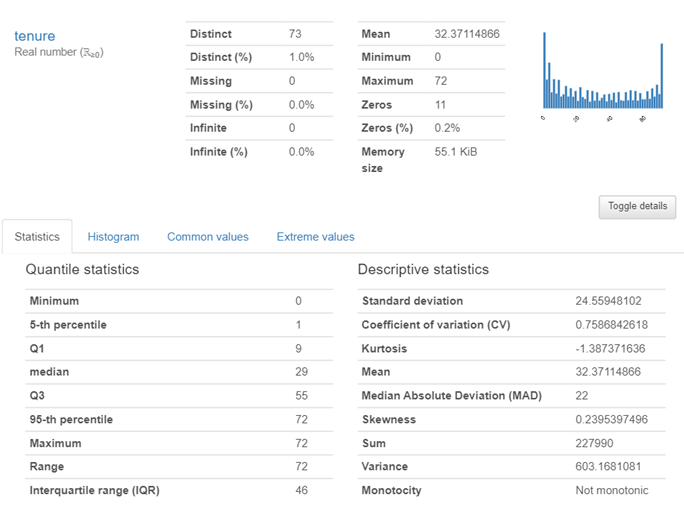

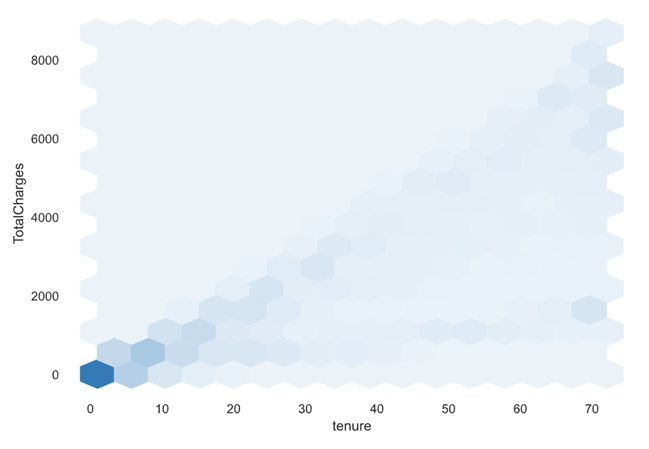

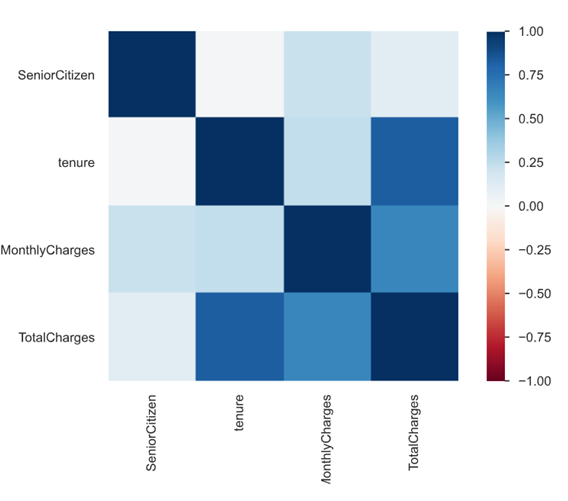

# Phik correlation, due to many categorical values

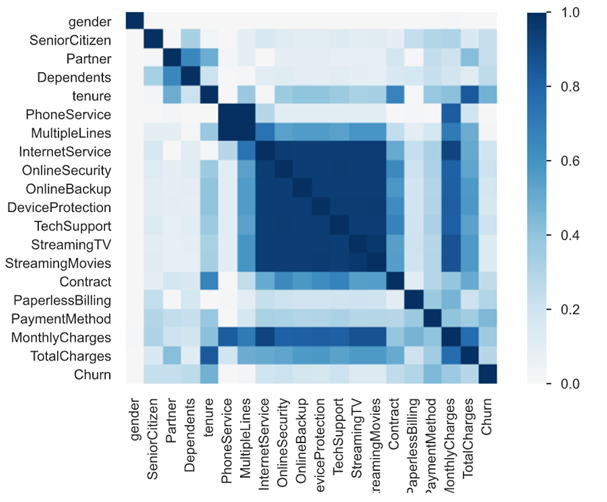

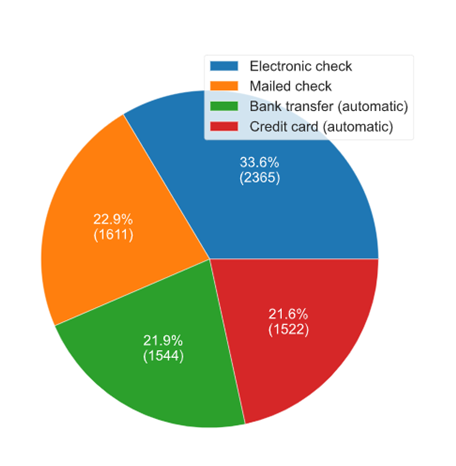

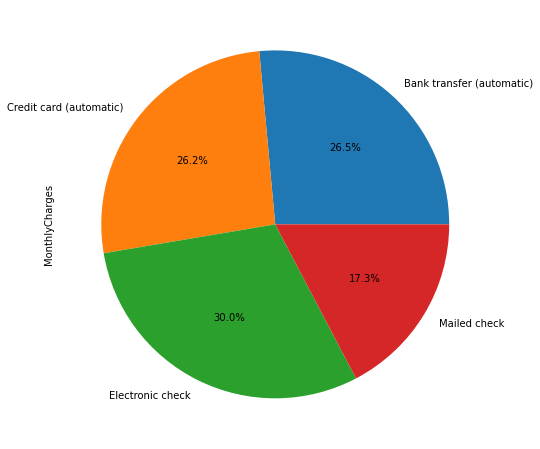

In [444]:
df1=df.groupby('PaymentMethod')['MonthlyCharges'].mean()
df1.plot.pie(figsize=(8,8), autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

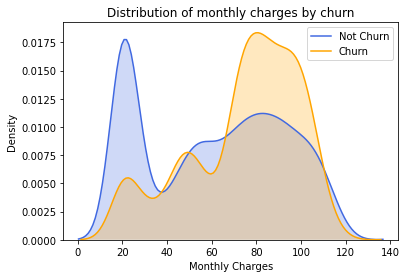

In [454]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

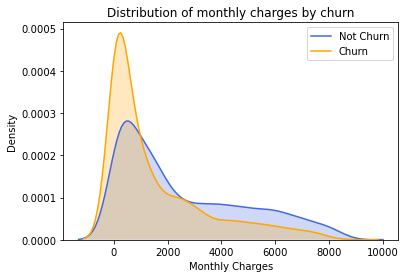

In [453]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Tenure distribution by churn')

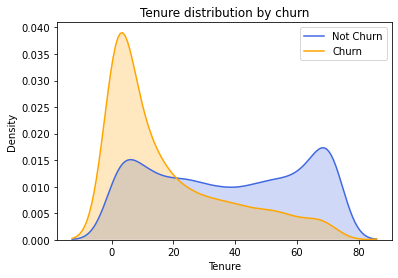

In [452]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Royalblue", shade = True)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Tenure distribution by churn')

In [230]:
# print("Number of rows: ", df.shape[0])
# counts = df.describe().iloc[0]
# display(
#     pd.DataFrame(
#         counts.tolist(), 
#         columns=["Count of values"], 
#         index=counts.index.values
#     ).transpose()
# )